<a href="https://www.kaggle.com/code/aleksandrmorozov123/risk-modeling-in-finance?scriptVersionId=186418096" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


**Read the dataset**

In [2]:
import pandas as pd
df = pd.read_csv ('/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

**Split the dataset into independent and target variables and test and train data**

In [3]:
feature_columns = df.columns[:-1]
features = df.loc [:, feature_columns]
target = df.loc [:, 'default.payment.next.month']

In [4]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split (features, target, test_size = 0.20, random_state = 0)

**Convert data into NumPy array**

In [5]:
import numpy as np

train_x, train_y = np.array (train_features), np.array (train_target)
test_x, test_y = np.array (test_features), np.array (test_target)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler ()
train_scaled_x = scaler.fit_transform (train_x)
test_scaled_x = scaler.transform (test_x)

**Designing a DL network using Keras**

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

num_features = train_scaled_x.shape [1]

model = Sequential ()
model.add (Dense (80, input_dim = num_features, activation = 'relu'))
model.add (Dropout (0.2))
model.add (Dense (80, activation = 'relu'))
model.add (Dropout (0.2))
model.add (Dense (40, activation = 'relu'))
model.add (BatchNormalization ())
model.add (Dense (1, activation = 'sigmoid'))

model.summary ()

2024-07-01 17:39:08.632145: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 17:39:08.632311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 17:39:08.769821: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,921 (46.57 KB)

 Trainable params: 11,841 (46.25 KB)

 Non-trainable params: 80 (320.00 B)

In [9]:
# configure the model
import tensorflow as tf

model.compile (optimizer = tf.optimizers.Adam (),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [11]:
# train the model
from keras.callbacks import History

callback_history = History ()
model.fit (train_scaled_x, train_y,
          validation_split = 0.2,
          epochs = 100,
          callbacks = [callback_history])

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7115 - loss: 0.5722 - val_accuracy: 0.8002 - val_loss: 0.4691
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8054 - loss: 0.4655 - val_accuracy: 0.8029 - val_loss: 0.4689
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8113 - loss: 0.4565 - val_accuracy: 0.8062 - val_loss: 0.4577
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8108 - loss: 0.4514 - val_accuracy: 0.8127 - val_loss: 0.4526
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8140 - loss: 0.4494 - val_accuracy: 0.8075 - val_loss: 0.4622
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8162 - loss: 0.4455 - val_accuracy: 0.8090 - val_loss: 0.4505
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8112 - loss: 0.4543 - val_accuracy: 0.8150 - val_loss: 0.4537
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8096 - loss: 0.4557 - val_accu

**Measuring the perfomance of the model**

In [12]:
test_loss, test_acc = model.evaluate (test_scaled_x, test_y)
print ('Test loss:', test_loss)
print ('Test accuracy:', test_acc)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8253 - loss: 0.4316
Test loss: 0.43011805415153503
Test accuracy: 0.828000009059906


In [13]:
predictions = model.predict (test_scaled_x)
pred_values = predictions.round().ravel ()

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0.5, 1.0, 'Credit card payment default prediction')

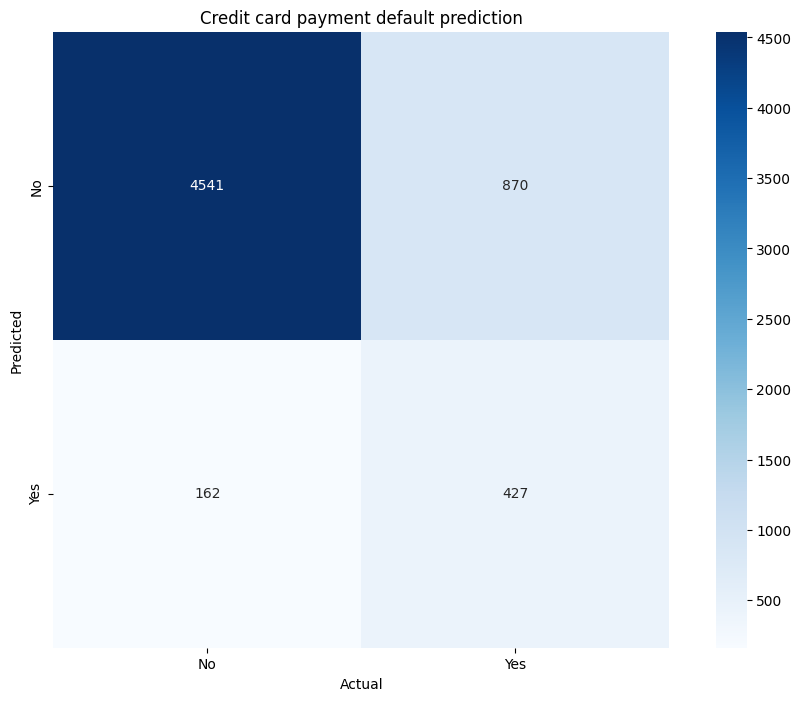

In [15]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix (test_y, pred_values)
flags = ['No', 'Yes']
plt.subplots (figsize = (12, 8))
sns.heatmap (matrix.T, square = True, annot = True, fmt = 'g', cbar = True,
            cmap = plt.cm.Blues, xticklabels = flags, yticklabels = flags)
plt.xlabel ('Actual')
plt.ylabel ('Predicted')
plt.title ('Credit card payment default prediction')